# 1. <a id='toc1_'></a>[IBM Employee Attrition forecast](#toc0_)

Add to Git:

git-nbmergedriver config --enable

**Table of contents**<a id='toc0_'></a>    
- 1. [IBM Employee Attrition forecast](#toc1_)    
- 2. [Importings](#toc2_)    
  - 2.1. [Libraries](#toc2_1_)    
  - 2.2. [Helper Function](#toc2_2_)    
  - 2.3. [Data loading](#toc2_3_)    
- 3. [Data exploration and problem comprehension](#toc3_)    
- 4. [Feature Engineering and Hypothesis Creation](#toc4_)    
  - 4.1. [Main Working Hypothesis](#toc4_1_)    
    - 4.1.1. [H01. The attrition level is the same for every job role.](#toc4_1_1_)    
    - 4.1.2. [H02. The attrition level is the same for every salary/income range.](#toc4_1_2_)    
    - 4.1.3. [H03. The attrition level is the same for every department.](#toc4_1_3_)    
    - 4.1.4. [H04. Employees working further from home are more propense to attrition.](#toc4_1_4_)    
    - 4.1.5. [H05. The attrition level is the same for every educational level.](#toc4_1_5_)    
    - 4.1.6. [H06. The attrition level is the same for every educational field.](#toc4_1_6_)    
    - 4.1.7. [H07. The attrition level is the same for every job satisfaction level.](#toc4_1_7_)    
    - 4.1.8. [H08. The attrition level is the same for every work life balance levels.](#toc4_1_8_)    
    - 4.1.9. [H09. The attrition level is the same for every relationship satisfaction level.](#toc4_1_9_)    
- 5. [Data selection and filtering](#toc5_)    
- 6. [Exploratory Data Analysis](#toc6_)    
- 7. [Data Preparation](#toc7_)    
- 8. [Feature Selection through Boruta algorithm](#toc8_)    
- 9. [Model implementation](#toc9_)    
- 10. [Hyperparameter Fine-Tuning](#toc10_)    
- 11. [Model Error Estimation and Interpretation](#toc11_)    
- 12. [Model Deployment](#toc12_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 2. <a id='toc2_'></a>[Importings](#toc0_)

## 2.1. <a id='toc2_1_'></a>[Libraries](#toc0_)

In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt

warnings.filterwarnings( 'ignore' )
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['font.size'] = 24
sns.set()
sns.set_style('dark')
pd.options.display.max_columns = None
pd.options.display.max_rows = 40

## 2.2. <a id='toc2_2_'></a>[Helper Function](#toc0_)

## 2.3. <a id='toc2_3_'></a>[Data loading](#toc0_)

In [3]:
data = pd.read_csv("~/repos/DataSolvers/IBM_EmployeeAttrition/data/raw/train.csv", low_memory=False)

# 3. <a id='toc3_'></a>[Data exploration and problem comprehension](#toc0_)
- Main goal/problem
- Sub-goals
- What will the finished product be?

In [4]:
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


# 4. <a id='toc4_'></a>[Feature Engineering and Hypothesis Creation](#toc0_)
- Mental map for hypothesis and questions
- Hypothesis and questions list
- Fillout remaining NAs 
- Derive new variables as needed

## 4.1. <a id='toc4_1_'></a>[Main Working Hypothesis](#toc0_)

### 4.1.1. <a id='toc4_1_1_'></a>[H01. The attrition level is the same for every job role.](#toc0_)
People working as **sales representative** are more prone to attrition (33.76%) followed by **human resources** (20.5%) and **laboratory technician** (18,26%).

In [8]:
data[['JobRole', 'Attrition']].groupby('JobRole').mean().sort_values(by='Attrition', ascending=False).reset_index()

,JobRole,Attrition
0,Sales Representative,0.337662
1,Human Resources,0.205882
2,Laboratory Technician,0.182635
3,Research Scientist,0.122093
4,Sales Executive,0.107042
5,Manager,0.081081
6,Healthcare Representative,0.064516
7,Research Director,0.028169
8,Manufacturing Director,0.025510


### 4.1.2. <a id='toc4_1_2_'></a>[H02. The attrition level is the same for every salary/income range.](#toc0_)
Based on the boxplot, it seems that there is no correlation between the Monthly Income and the attrition probability.

<Axes: xlabel='Attrition', ylabel='MonthlyRate'>

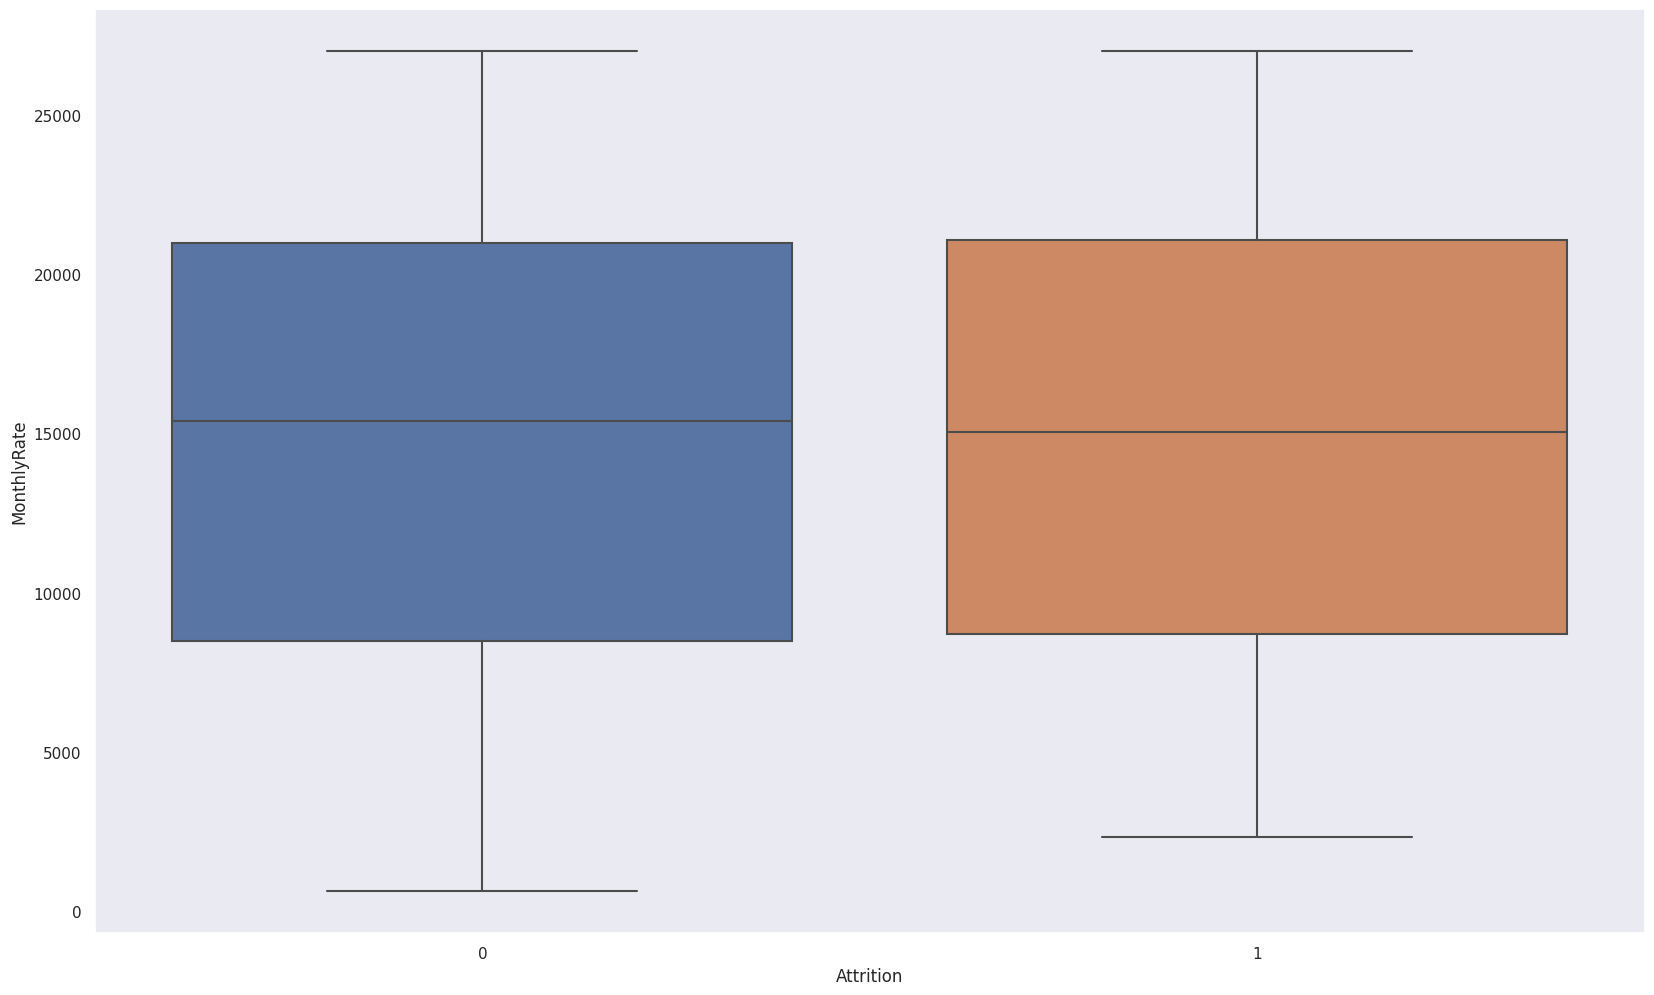

In [12]:
sns.boxplot(data=data, y='MonthlyRate', x='Attrition')

### 4.1.3. <a id='toc4_1_3_'></a>[H03. The attrition level is the same for every department.](#toc0_)
The attrition is a bit stronger in the **human resources** department (17.95%), followed by the **sales** department (14,22%) and **research and development** department (10.8%).

In [9]:
data[['Department', 'Attrition']].groupby('Department').mean().sort_values(by='Attrition', ascending=False).reset_index()

,Department,Attrition
0,Human Resources,0.179487
1,Sales,0.142251
2,Research & Development,0.107969


### 4.1.4. <a id='toc4_1_4_'></a>[H04. Employees working further from home are more propense to attrition.](#toc0_)
Despite the distribution of distance from home of employees who left the company be slightly wider than those who didn't leave, this effect is very small and just in the upper range of distances (above the median).

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

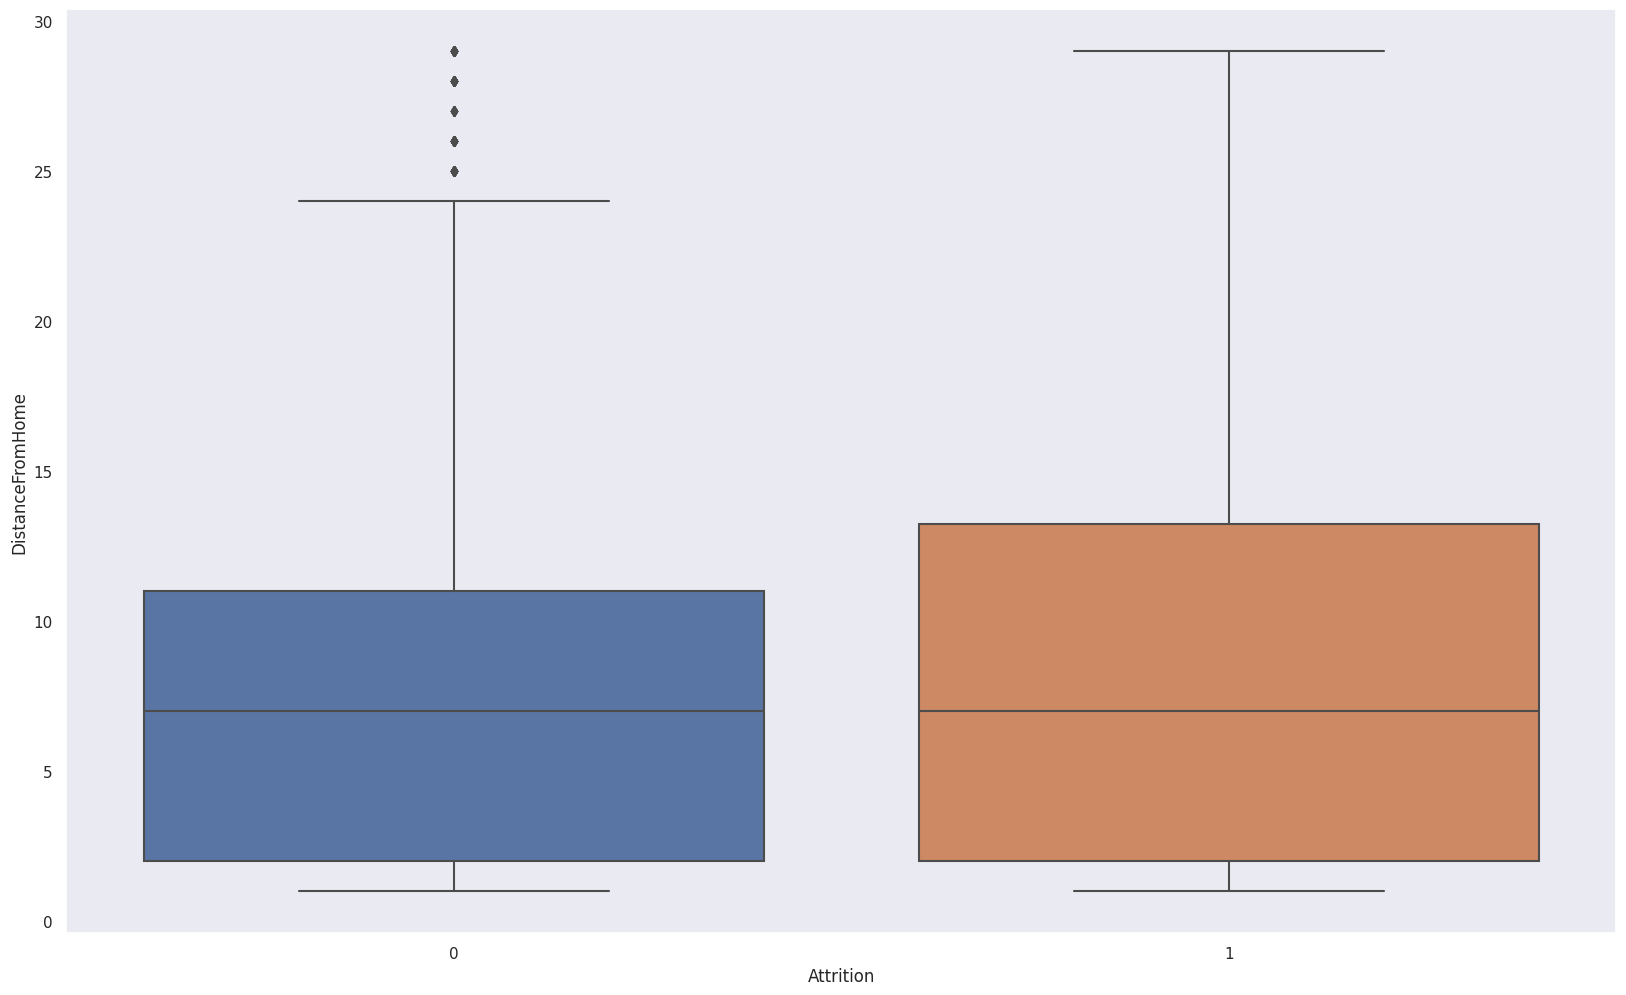

In [13]:
sns.boxplot(data=data, y='DistanceFromHome', x='Attrition')

### 4.1.5. <a id='toc4_1_5_'></a>[H05. The attrition level is the same for every educational level.](#toc0_)
People with lower educational levels tend to leave more the company


In [21]:
data['Education'].unique()

array([ 3,  4,  1,  2,  5, 15])

In [20]:
data[data['Education']==15]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
527,527,38,Travel_Rarely,548,Research & Development,1,15,Life Sciences,1,1,Female,72,3,1,Laboratory Technician,4,Divorced,2644,6217,7,Y,No,13,3,1,80,1,7,2,3,5,2,1,4,0


In [23]:
data[['Education', 'Attrition']].groupby('Education').mean().sort_values(by='Attrition', ascending=False).reset_index()

,Education,Attrition
0,1,0.186813
1,3,0.134897
2,2,0.111842
3,4,0.081897
4,5,0.045455
5,15,0.000000


<Axes: xlabel='Education', ylabel='Attrition'>

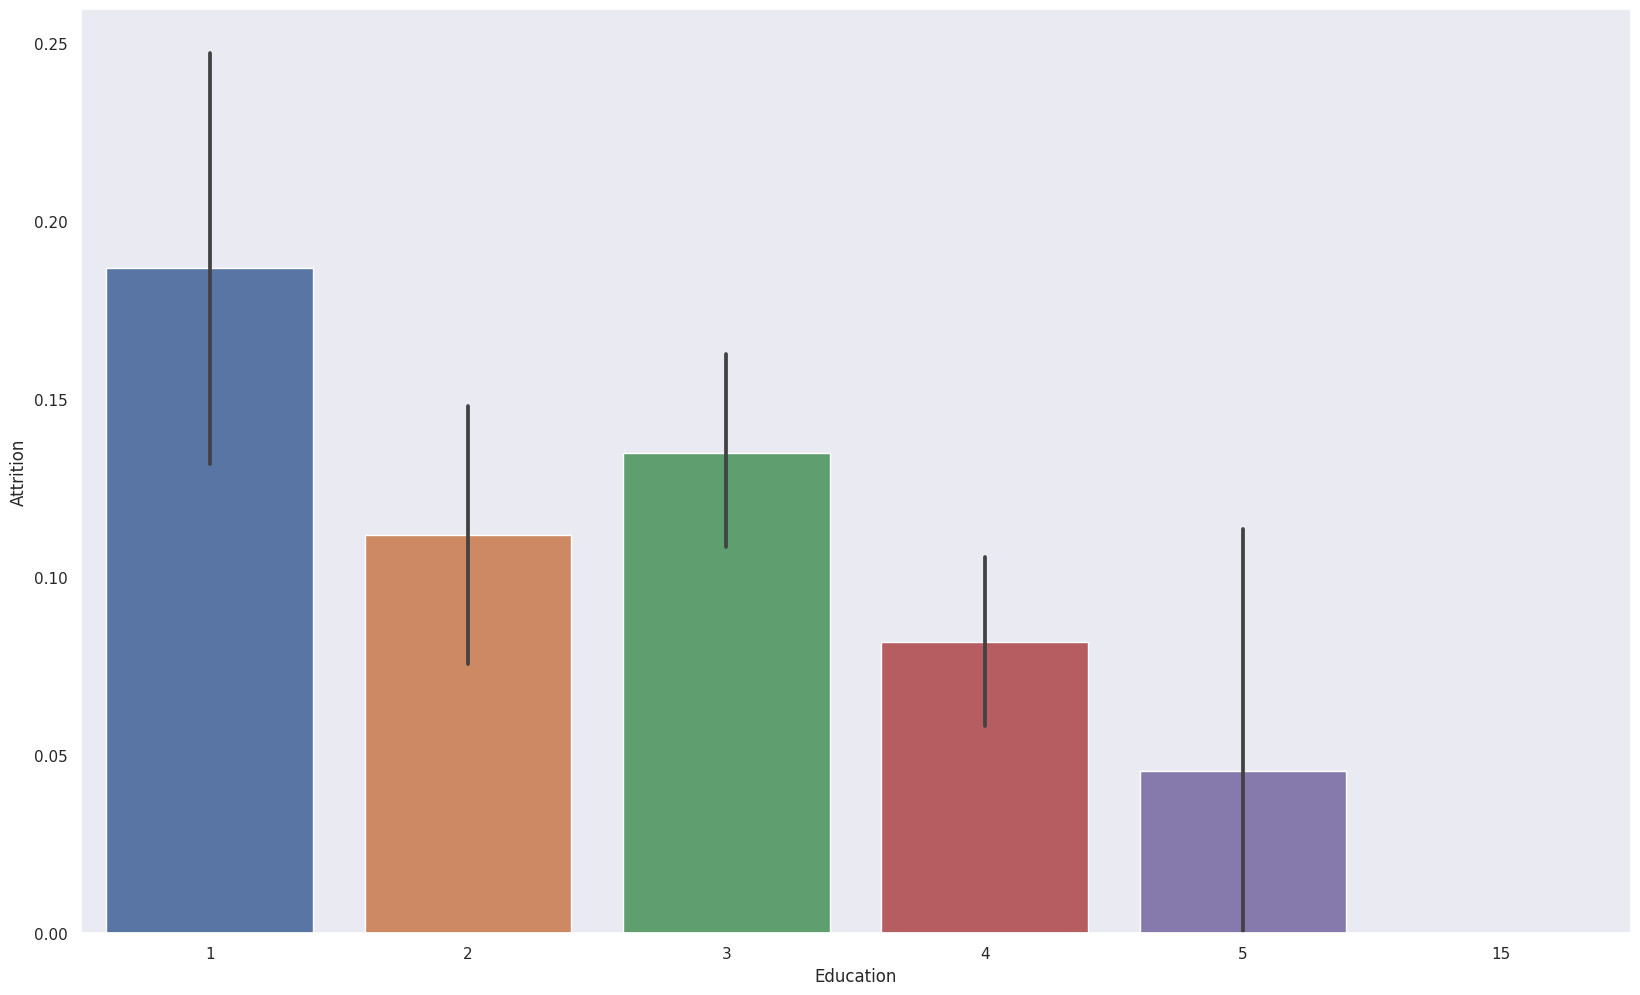

In [18]:
sns.barplot(data=data, x='Education', y='Attrition')

### 4.1.6. <a id='toc4_1_6_'></a>[H06. The attrition level is the same for every educational field.](#toc0_)


### 4.1.7. <a id='toc4_1_7_'></a>[H07. The attrition level is the same for every job satisfaction level.](#toc0_)


### 4.1.8. <a id='toc4_1_8_'></a>[H08. The attrition level is the same for every work life balance levels.](#toc0_)


### 4.1.9. <a id='toc4_1_9_'></a>[H09. The attrition level is the same for every relationship satisfaction level.](#toc0_)

# 5. <a id='toc5_'></a>[Data selection and filtering](#toc0_)
- Filter data rows
- Filter data columns
- Based on the questions and hypothesis, select columns
- Create a new filtered dataframe
- Create the widgets to filter the data

# 6. <a id='toc6_'></a>[Exploratory Data Analysis](#toc0_)
- Answer the hypothesis list
- Build data visualization solutions and plots

# 7. <a id='toc7_'></a>[Data Preparation](#toc0_)
- Normalize, re-scale and transform (enconding) variables to suit model requirements
- It may be a good idea to normalize all of the features so they are comparable in magnitude

# 8. <a id='toc8_'></a>[Feature Selection through Boruta algorithm](#toc0_)
- Use Boruta algorithm to select best features to machine learning models

# 9. <a id='toc9_'></a>[Model implementation](#toc0_)
- Implement different machine learning models and algorithms
- Conduct cross-velidation computing
- Conduct single performance metrics computing

# 10. <a id='toc10_'></a>[Hyperparameter Fine-Tuning](#toc0_)
- Implement hyperparameter search (Bayes Search) to find best model hyperparameter values
- Re-train model using best values

# 11. <a id='toc11_'></a>[Model Error Estimation and Interpretation](#toc0_)
- Use model errors to interpret the goals 

# 12. <a id='toc12_'></a>[Model Deployment](#toc0_)
- Deploy the model to a cloud service so it can be used by its consumers